# **Uber Ride Data Analysis**
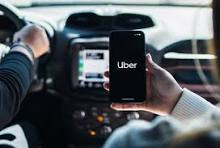

In [53]:
#nessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
URL=("https://github.com/Taj1920/Data_Analysis/raw/refs/heads/main/Uber_Analysis/UberDataset.csv")
df=pd.read_csv(URL)
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


# **Data Cleaning**

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [56]:
# handling nan values in PURPOSE column
df["PURPOSE"].isnull().sum()
df["PURPOSE"]=df["PURPOSE"].fillna("unknown")
#Droping nan values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     1155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


In [57]:
#drop duplicate rows
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1154 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1154 non-null   object 
 1   END_DATE    1154 non-null   object 
 2   CATEGORY    1154 non-null   object 
 3   START       1154 non-null   object 
 4   STOP        1154 non-null   object 
 5   MILES       1154 non-null   float64
 6   PURPOSE     1154 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.1+ KB


In [58]:
#reset the index
df.reset_index(inplace=True)
df=df.drop("index",axis=1)
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,unknown
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [59]:
df["END_DATE"].unique()

array(['01-01-2016 21:17', '01-02-2016 01:37', '01-02-2016 20:38', ...,
       '12/31/2016 15:38', '12/31/2016 21:50', '12/31/2016 23:51'],
      dtype=object)

In [60]:
#replace old value k?rachi with karachi and r?walpindi with rawalpindi in Start
df["START"]=df["START"].str.replace("Kar?chi","karachi")
df["START"]=df["START"].str.replace("R?walpindi","rawalpindi")
df["START"].unique()

array(['Fort Pierce', 'West Palm Beach', 'Cary', 'Jamaica', 'New York',
       'Elmhurst', 'Midtown', 'East Harlem', 'Flatiron District',
       'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Downtown', 'Gulfton', 'Houston', 'Eagan Park',
       'Morrisville', 'Durham', 'Farmington Woods', 'Whitebridge',
       'Lake Wellingborough', 'Fayetteville Street', 'Raleigh',
       'Hazelwood', 'Fairmont', 'Meredith Townes', 'Apex', 'Chapel Hill',
       'Northwoods', 'Edgehill Farms', 'Tanglewood', 'Preston',
       'Eastgate', 'East Elmhurst', 'Jackson Heights', 'Long Island City',
       'Katunayaka', 'Unknown Location', 'Colombo', 'Nugegoda',
       'Islamabad', 'rawalpindi', 'Noorpur Shahan', 'Heritage Pines',
       'Westpark Place', 'Waverly Place', 'Wayne Ridge', 'Weston',
       'East Austin', 'West University', 'South Congress', 'The Drag',
       'Congress Ave District', 'Red River District', 'Georgian Acres',
       'North Austin', 'Coxville', 'Conven

In [61]:
#replace old value Kar?chi with karachi and R?walpindi with rawalpindi IN STOP column
df["STOP"]=df["STOP"].str.replace("Kar?chi","karachi")
df["STOP"]=df["STOP"].str.replace("R?walpindi","rawalpindi")
df["STOP"].unique()

array(['Fort Pierce', 'West Palm Beach', 'Palm Beach', 'Cary',
       'Morrisville', 'New York', 'Queens', 'East Harlem', 'NoMad',
       'Midtown', 'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Queens County', 'Gulfton', 'Downtown',
       'Houston', 'Jamestown Court', 'Durham', 'Whitebridge',
       'Lake Wellingborough', 'Raleigh', 'Umstead', 'Hazelwood',
       'Westpark Place', 'Meredith Townes', 'Leesville Hollow', 'Apex',
       'Chapel Hill', 'Williamsburg Manor', 'Macgregor Downs',
       'Edgehill Farms', 'Northwoods', 'Tanglewood', 'Preston',
       'Walnut Terrace', 'Jackson Heights', 'East Elmhurst',
       'Midtown West', 'Long Island City', 'Jamaica', 'Unknown Location',
       'Colombo', 'Nugegoda', 'Katunayaka', 'Islamabad', 'rawalpindi',
       'Noorpur Shahan', 'Heritage Pines', 'Waverly Place', 'Wayne Ridge',
       'Depot Historic District', 'Weston', 'West University',
       'South Congress', 'Arts District', 'Congress Ave District

In [62]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,unknown
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1149,12/31/2016 1:07,12/31/2016 1:14,Business,karachi,karachi,0.7,Meeting
1150,12/31/2016 13:24,12/31/2016 13:42,Business,karachi,Unknown Location,3.9,Temporary Site
1151,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1152,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


# **Feature Engineering**

In [63]:
df["START_DATE"].unique()

array(['01-01-2016 21:11', '01-02-2016 01:25', '01-02-2016 20:25', ...,
       '12/31/2016 15:03', '12/31/2016 21:32', '12/31/2016 22:08'],
      dtype=object)

In [64]:
#replacing "/" to "-" in start date
df["START_DATE"]=df["START_DATE"].str.replace("/","-")
df["START_DATE"].unique()

array(['01-01-2016 21:11', '01-02-2016 01:25', '01-02-2016 20:25', ...,
       '12-31-2016 15:03', '12-31-2016 21:32', '12-31-2016 22:08'],
      dtype=object)

In [65]:
df["END_DATE"].unique()

array(['01-01-2016 21:17', '01-02-2016 01:37', '01-02-2016 20:38', ...,
       '12/31/2016 15:38', '12/31/2016 21:50', '12/31/2016 23:51'],
      dtype=object)

In [66]:
#replacing "/" to "-" in end date
df["END_DATE"]=df["END_DATE"].str.replace("/","-")
df["END_DATE"].unique()

array(['01-01-2016 21:17', '01-02-2016 01:37', '01-02-2016 20:38', ...,
       '12-31-2016 15:38', '12-31-2016 21:50', '12-31-2016 23:51'],
      dtype=object)

In [67]:
#convert to datetime datatype
df["START_DATE"] = pd.to_datetime(df["START_DATE"])
df["END_DATE"] = pd.to_datetime(df["END_DATE"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1154 non-null   datetime64[ns]
 1   END_DATE    1154 non-null   datetime64[ns]
 2   CATEGORY    1154 non-null   object        
 3   START       1154 non-null   object        
 4   STOP        1154 non-null   object        
 5   MILES       1154 non-null   float64       
 6   PURPOSE     1154 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.2+ KB


In [68]:
#Separate Date and Time columns
df["DATE"] = df["START_DATE"].dt.date
df["TIME"] = df["START_DATE"].dt.hour
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,unknown,2016-01-02,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14


In [69]:
#Time ---> Morning,Afternoon,Evening,Night
#New col --> DAY-NIGHT
#Morning --> 0 to 10
#Afternoon --> 11 to 15
#Evening --> 16 to 19
#Night --> 20 to 24
out = []
for i in df["TIME"]:
  if 0<=i<=10:
    out.append("Morning")
  elif 11<=i<=15:
    out.append("Afternoon")
  elif 16<=i<=19:
    out.append("Evening")
  else:
    out.append("Night")
df['DAY_NIGHT'] = out
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY_NIGHT
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,unknown,2016-01-02,1,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon


In [70]:
#create DAY column
df["DAY"] = df["START_DATE"].dt.weekday
d = {0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"}
df["DAY"] = df["DAY"].map(d)
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY_NIGHT,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,unknown,2016-01-02,1,Morning,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening,Tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon,Wed


In [71]:
#create Month column
df["MONTH"] = df["START_DATE"].dt.month
d = {1:"Jan",  2:"Feb",  3:"Mar",  4:"Apr",  5:"May",  6:"Jun",  7:"Jul",  8:"Aug",  9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}
df["MONTH"] = df["MONTH"].map(d)
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY_NIGHT,DAY,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night,Fri,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,unknown,2016-01-02,1,Morning,Sat,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night,Sat,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening,Tue,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon,Wed,Jan


# **Data Visualization**

In [72]:
#save cleaned data
df.to_csv("cleaned_uber_data.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY_NIGHT,DAY,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night,Fri,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,unknown,2016-01-02,1,Morning,Sat,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night,Sat,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening,Tue,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon,Wed,Jan


In [73]:
def data_label(a):
  for i in a.containers:
    a.bar_label(i)

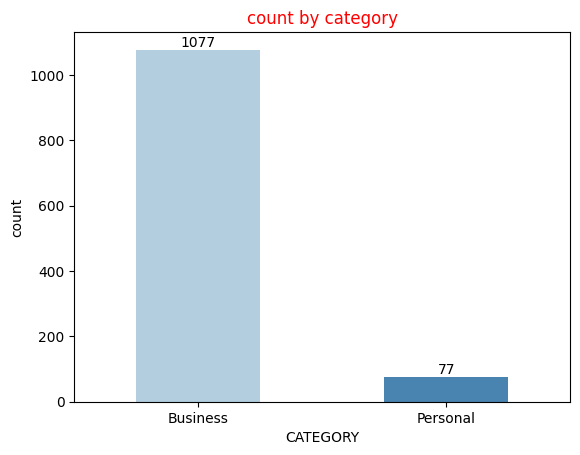

In [74]:
#count by CATEGORY
a = sns.countplot(x="CATEGORY",data=df,hue="CATEGORY",palette="Blues",width=0.5)
plt.title("count by category",color="red")
data_label(a)

**Most of the rides has booked for business category than personal.**

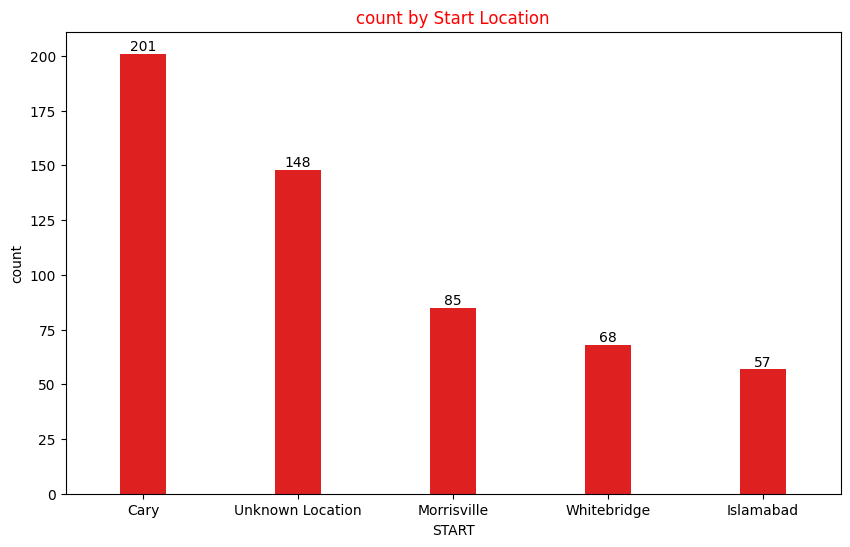

In [75]:
#count by START
plt.figure(figsize=(10,6))
data = df["START"].value_counts()
data = pd.DataFrame(data[data>50]).reset_index()
a = sns.barplot(x="START",y="count",data=data,width=0.3,color="red")
plt.title("count by Start Location",color='red')
data_label(a)

## **Most of the bookings are from cary compared to other locations**

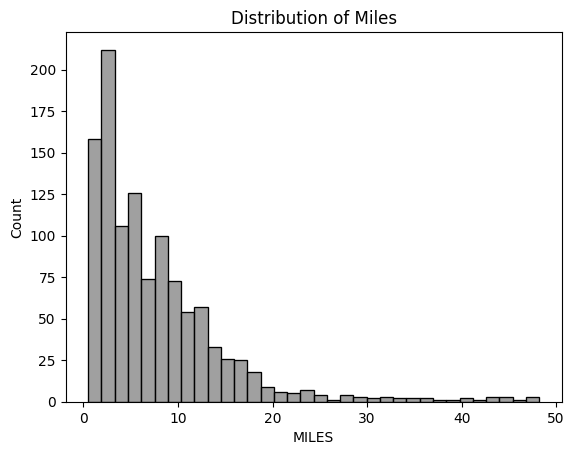

In [76]:
#Distribution of MILES
sns.histplot(x="MILES",data=df[df["MILES"]<50],color='gray')
plt.title("Distribution of Miles")
plt.show()

**Most of the rides are for 0 to 20 miles.**

**Rides count is negligible from more than 20 miles.**

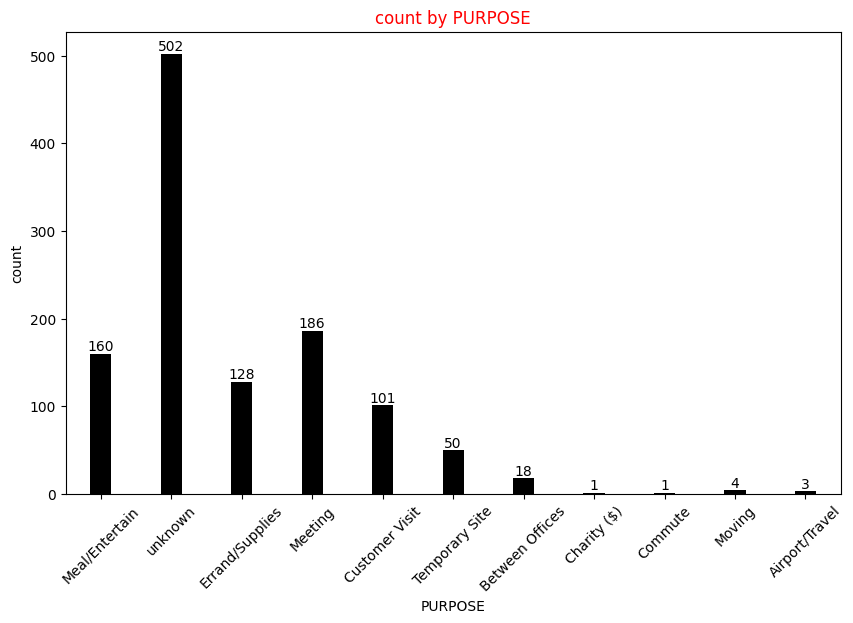

In [77]:
#count by PURPOSE
plt.figure(figsize=(10,6))
a = sns.countplot(x="PURPOSE",data=df,width=0.3,color='black')
plt.title("count by PURPOSE",color='red')
plt.xticks(rotation=45)
data_label(a)

**People are liking to book the rides for Meal/Entertain,Errand/Supplies,meetings,customer visits**.

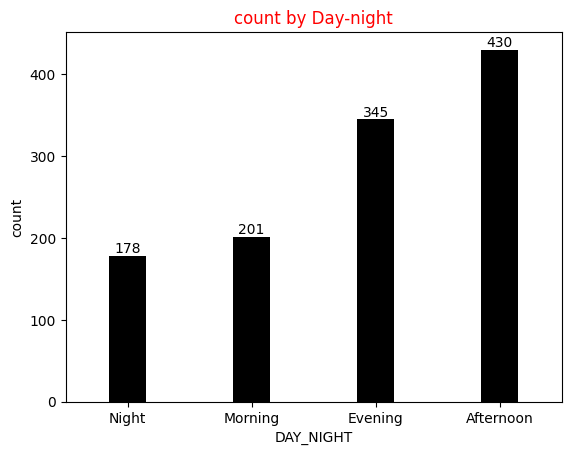

In [80]:
#count by PURPOSE
a = sns.countplot(x="DAY_NIGHT",data=df,width=0.3,color='black')
plt.title("count by Day-night",color='red')
data_label(a)

**Most of the bookings are at Afternoon and Evening**

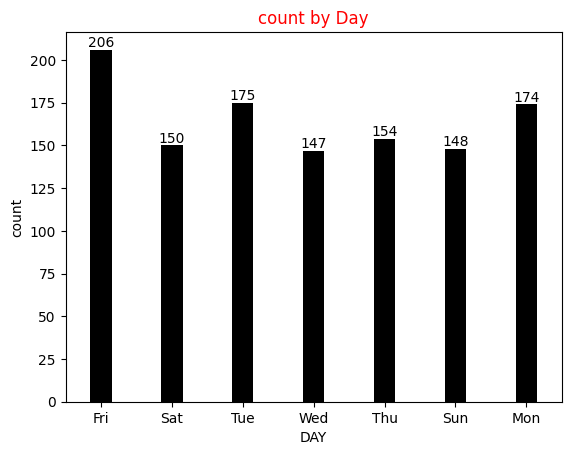

In [81]:
#count by Day
a = sns.countplot(x="DAY",data=df,width=0.3,color='black')
plt.title("count by Day",color='red')
data_label(a)

**Most of the bookings are on Fri,Sat,Mon**

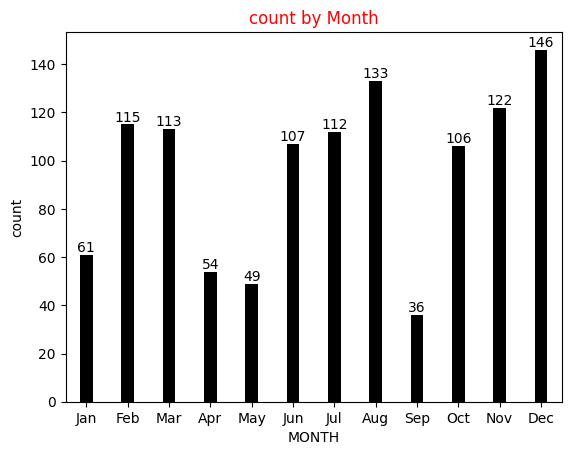

In [82]:
#count by Month
a = sns.countplot(x="MONTH",data=df,width=0.3,color='black')
plt.title("count by Month",color='red')
data_label(a)

**Most of the bookings are in Dec,Nov,Aug**